In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [45]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

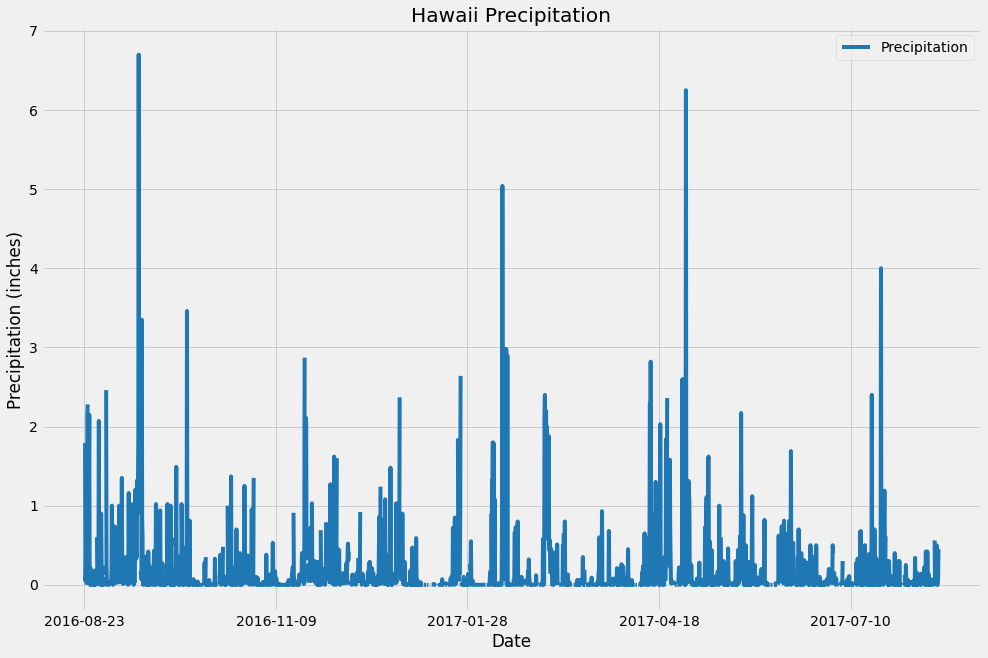

In [123]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores, columns = ['date', 'precipitation'])
date_index =scores_df.set_index('date')

# Sort the dataframe by date
sorted_scores_df = date_index.sort_values (by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15, 10))
sorted_scores_df.plot(ax = ax, x_compat = True, color = "tab:blue")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Hawaii Precipitation")
plt.legend(["Precipitation"],loc='upper right')
plt.savefig("./precipitation_by_dates.png")
plt.show()



# Exploratory Station Analysis

In [97]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [124]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active_station = active_station[0]['station']
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(f"Most active station is {most_active_station}")
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == most_active_station)\
.all()

Most active station is USC00519281


[(54.0, 85.0, 71.66378066378067)]

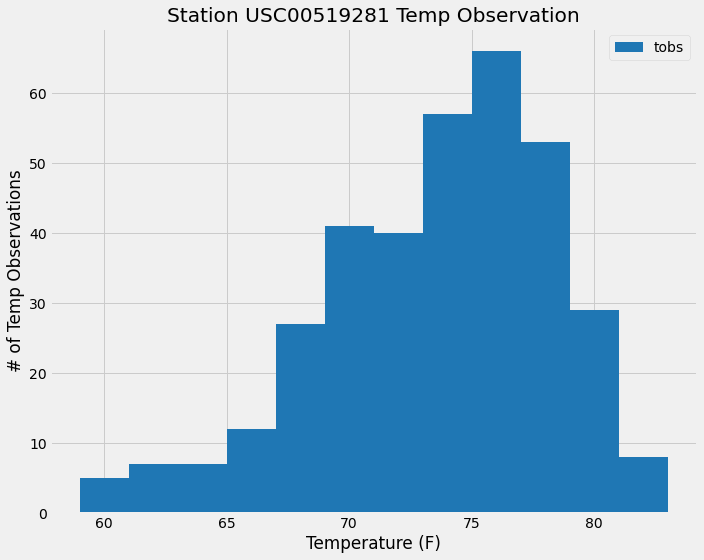

In [128]:
# Using the most active station id

max_temp_obs = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date >= prev_year)\
    .filter(Measurement.station == most_active_station)\
    .all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

histogram_df = pd.DataFrame(max_temp_obs, columns = ['date', 'tobs'])
fig, ax = plt.subplots(figsize = (10, 8))
histogram_df.plot.hist(bins=12, ax = ax, color="tab:blue")
plt.xlabel("Temperature (F)")
plt.ylabel("# of Temp Observations")
plt.title(f"Station {most_active_station} Temp Observation")
plt.tight_layout()
plt.savefig("./histogram of temperature.png")
plt.show()

# Close session

In [129]:
# Close Session
session.close()

In [138]:
def tobs():
    prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)
    active_station = session.query(Measurement.station, func.count(Measurement.id)).\
            group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
    most_active_station = active_station[0]['station']
    max_temp_obs = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.date >= prev_year).\
        filter(Measurement.station == most_active_station).\
        all()

    tobs_dict = dict(max_temp_obs)
    return(max_temp_obs)
tobs()

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',